In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pymysql as pms
import sqlalchemy as sa
from sqlalchemy import create_engine
import mysql.connector 

In [31]:
connection = mysql.connector.connect(host='localhost', user='root', passwd='root', database='csv_db 6')
connection


In [34]:
csv_db = pd.read_sql_query("SELECT * FROM `data2`", connection)
csv_db


C:\Users\artur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,id,COL 1,COL 2,COL 3,COL 4,COL 5,COL 6,COL 7
0,1,Order_ID,Product,Quantity,Price,Order_Date,Address,Total
1,2,295665,Macbook Pro Laptop,1,1700.0,12/30/19 00:01,"136 Church St, New York City, NY 10001",1700.0
2,3,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",600.0
3,4,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",11.95
4,5,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",149.99
...,...,...,...,...,...,...,...,...
24985,24986,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",14.95
24986,24987,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",7.68
24987,24988,319668,Vareebadd Phone,1,400.0,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",400.0
24988,24989,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",11.99


In [45]:
csv_db.drop(columns = ['id'],axis = 1 , inplace = True)

In [101]:
csv_db.rename(columns = {'COL 1':'Order_ID', 'COL 2':'Product', 'COL 3':'Quantity', 'COL 4':'Price', 'COL 5':'Order_Date', 'COL 6': 'Address', 'COL 7': 'Total' }, inplace = True)

In [47]:
csv_db

,Order_ID,Product,Quantity,Price,Order_Date,Address,Total
1,295665,Macbook Pro Laptop,1,1700.0,12/30/19 00:01,"136 Church St, New York City, NY 10001",1700.0
2,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",600.0
3,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",11.95
4,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",149.99
5,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",11.95
...,...,...,...,...,...,...,...
24985,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",14.95
24986,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",7.68
24987,319668,Vareebadd Phone,1,400.0,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",400.0
24988,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",11.99


In [51]:
csv_db['Order_Date'] = pd.to_datetime(csv_db.Order_Date, format='%m/%d/%y %H:%M')  

In [102]:
csv_db

,Order_ID,Product,Quantity,Price,Order_Date,Address,Total,Day_name
1,295665,Macbook Pro Laptop,1,1700.0,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",1700.0,Monday
2,295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",600.0,Sunday
3,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",11.95,Thursday
4,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",149.99,Sunday
5,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",11.95,Wednesday
...,...,...,...,...,...,...,...,...
24985,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",14.95,Wednesday
24986,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",7.68,Sunday
24987,319668,Vareebadd Phone,1,400.0,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",400.0,Monday
24988,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",11.99,Tuesday


In [57]:
csv_db.drop(columns = ['Day_of_Week'],axis = 1 , inplace = True)


In [64]:
csv_db.Order_Date.dt.day_name()

1           Monday
2           Sunday
3         Thursday
4           Sunday
5        Wednesday
           ...    
24985    Wednesday
24986       Sunday
24987       Monday
24988      Tuesday
24989     Saturday
Name: Order_Date, Length: 24989, dtype: object

In [65]:
csv_db['Day_of_Week'] = csv_db.Order_Date.dt.day_name()

In [72]:
csv_db.rename(columns = {'Day_of_Week':'Day_name'}, inplace = True)

In [90]:
res = csv_db.groupby('Day_name').agg(['count'])['Total']

,count
Day_name,
Friday,3260
Monday,4074
Saturday,3173
Sunday,3985
Thursday,3243
Tuesday,4014
Wednesday,3240


<BarContainer object of 7 artists>

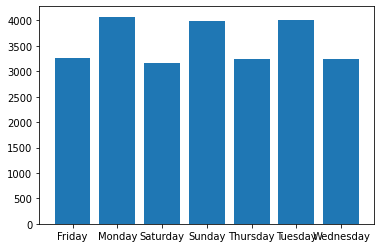

In [100]:
plt.bar(res.index, res['count']) 